<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS323: Digital Image Processing – Practical Class 
</h1>


<strong>
<center>[0921 - 323]: [Digital Image Processing]
<br><br>
<center>Section: [Male/Female]
<br><br><br><br>

<center>Lab [04]: [Spatial Filtering]
<br><br><br><br>

<center> Date: []
<center> Time: []
<br><br>


<center> Instructor: []
</strong>

# Introduction

In this lab, we will discuss some of the spatial filtering techniques that are mostly used for image enhancement. Spatial filtering modifies an image by replacing the value of each pixel with a function of the values of the pixel and its neighbors. There are two types of Spatial filtering: <br>
1. Linear Spatial Filter 
2. Non-linear Spatial Filter 

This lab covers examples of linear spatial filtering. 

**Objectives: **
* Learn the basics of linear spatial filtering 
* Apply spatial filtering on images for enhancements

**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: Fundamentals of Linear spatial filtering.
* Smoothing (averaging) Spatial Filter - Box Filter  
* Smoothing (averaging) Spatial Filter - Gaussian Filter

Part 2: Lab Task.
*	Student solves programming questions using Python.


# Part 1: Fundamentals of spatial filtering

## 1.1 Linear spatial filtering 


In general, linear spatial filtering of an image of size M x N with a kernel of size m x n is given by the expression: <br>
$g(x, y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b}= w(s, t)  f(x+s, y+t)$


## 1.2 Spatial Correlation and Convolution
Basically the same, except that the kernel is rotated by 180° 

#Add image here

## 1.3 How convolution works? 


In [1]:
from IPython.core.display import Video
Video("img/2D_convolution_kernel_size_3.mp4", embed=True)
#Animation Source: https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d  

## 1.4 Smoothing (lowpass) Spatial Filters
Smoothing (also called averaging) spatial filters are used to reduce sharp transitions in intensity. 

Examples of Smoothing spatial filters:
1. Box Filter 
2. Guassian Filter



![3D structure, 2D structure and example of filter (a) Box filter (b) Gaussian filter and (c) Laplace filter](img/low_pass_filters.png)
3D structure, 2D structure and example of filter (a) Box filter (b) Gaussian filter and (c) Laplace filter
<a href="https://towardsdatascience.com/image-processing-class-egbe443-4-filters-aa1037676130">Source</a>

In [2]:
import cv2 #openCv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20)
    if len(image.shape) < 3:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

In [5]:
def correlation(img, kernel): 
    row, col = img.shape #assuming it is a gray-sclae image
    m, n = kernel.shape #size of the kernel
    padded_image = np.zeros((row+m-1, col+n-1)) 
    m//=2 #the range is(-m, .. , 0, .. ,m) 
    n//=2 #the range is(-n, .. , 0, .. ,n) 
    filter_img = np.zeros(img.shape)
    padded_image[m:padded_image.shape[0]-m, n:padded_image.shape[1]-n] = img #to get the original img values
    for i in range(m, padded_image.shape[0]-m):
        for j in range(n, padded_image.shape[1]-n):
            temp = padded_image[i-m:i+m+1, j-m:j+m+1]
            filter_img[i-m, j-n] = (temp * kernel).sum()
    return filter_img

## 1.4.1 Box Filter 
* It calculates the local average around each pixel
* It gives the same importance to all pixels regardless its distance from the center



![Blur_box](img/box_blur.gif)
3x3 Blur box 


In [6]:
def BoxFilter(m, n, r=1): #3x3 kernel
    kernel = np.ones((m, n)) / ((r*2+1)**2.0)
    return kernel

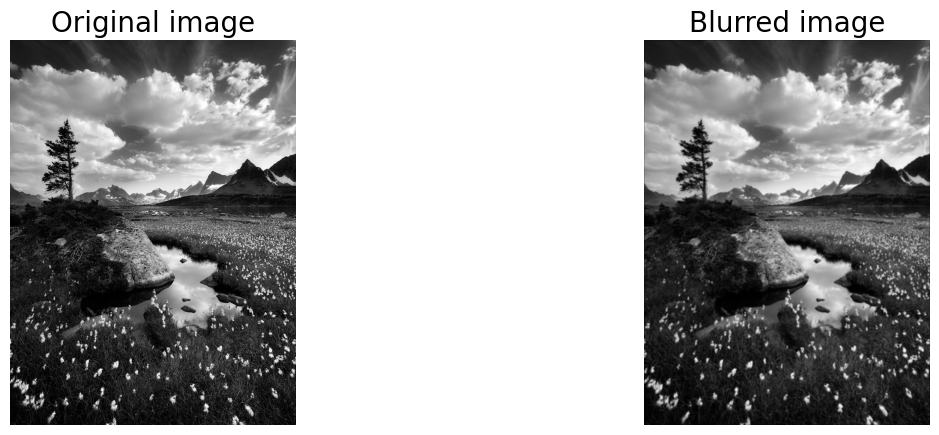

In [7]:
kernel = BoxFilter(3, 3, 4)
im = cv2.imread('img/box_blur_original.jpeg', 0) 
blurred_image = correlation(im, kernel)

plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(im, 'Original image')
plt.subplot(122), plot_image(blurred_image,'Blurred image')

plt.show()

In [8]:
im = cv2.imread('img/box_blur_original.jpeg', 0) 
blurred_image = cv2.blur(im,(3,3)) #openCV

plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(im, 'Original image')
plt.subplot(122), plot_image(blurred_image,'Blurred image')

plt.show()

## 1.4. 2	Gaussian Filter
* Circularly symmetric
* Built using the equation <br>
$g(x,y) = \frac{1}{2\pi\sigma^2} \exp^{-\frac{x^2+y^2}{2\sigma^2}}$



![gaussian_kernel](img/gaussian_kernel.png)
5x5 Gaussian kernel 

In [9]:
from IPython.core.display import Video
Video("img/Gussian_Blur.mp4", embed=True)
#Animation Source: Grant Sanderson - Convolutions in image processing 

In [10]:
def gaussian_filter(m,n,sigma): #mxn is the kernel size
    kernel = np.zeros((m,n))
    m//=2 # so the range is (-m,.., 0, ...,m)
    n//=2 # so the range is (-n,.., 0, ...,n) 
    for x in  range(-m, m+1):
        for y in range(-n, n+1):
            denominator = 2 * np.pi * (sigma ** 2) #denominator 
            numerator = np.exp(-1 * (x**2 + y**2) / (2 * (sigma**2)))
            kernel[x+m, y+n] = (1 / denominator)  * numerator #+m to reset the index to the zero 
    return kernel 

In [11]:
kernel = gaussian_filter(3, 3, 1)

In [12]:
print(kernel)

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


In [13]:
im = cv2.imread('img/box_blur_original.jpeg', 0) 
gussian_blur =  correlation(im, kernel)

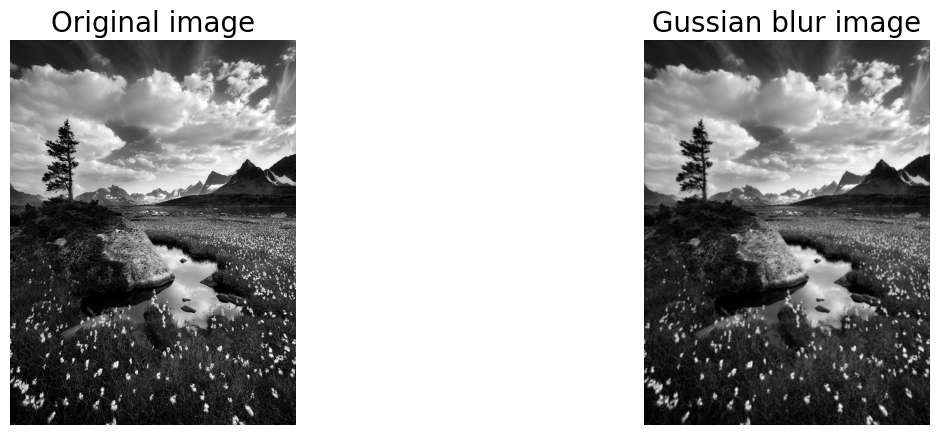

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(im, 'Original image')
plt.subplot(122), plot_image(gussian_blur,'Gussian blur image')

plt.show()

In [15]:
im = cv2.imread('img/box_blur_original.jpeg', 0) 
gussian_blur = cv2.GaussianBlur(im,(3,3),sigmaX=15) #openCV
plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(im, 'Original image')
plt.subplot(122), plot_image(gussian_blur,'Gussian blur image')

plt.show()

# Part 2: Lab Task 

## Task 01
Write a program that will read the original image on the lift then generate the image on the right.
The input image is available in folder img with the name task_1.jpeg

![task_1_out](img/task_1_output.png) 

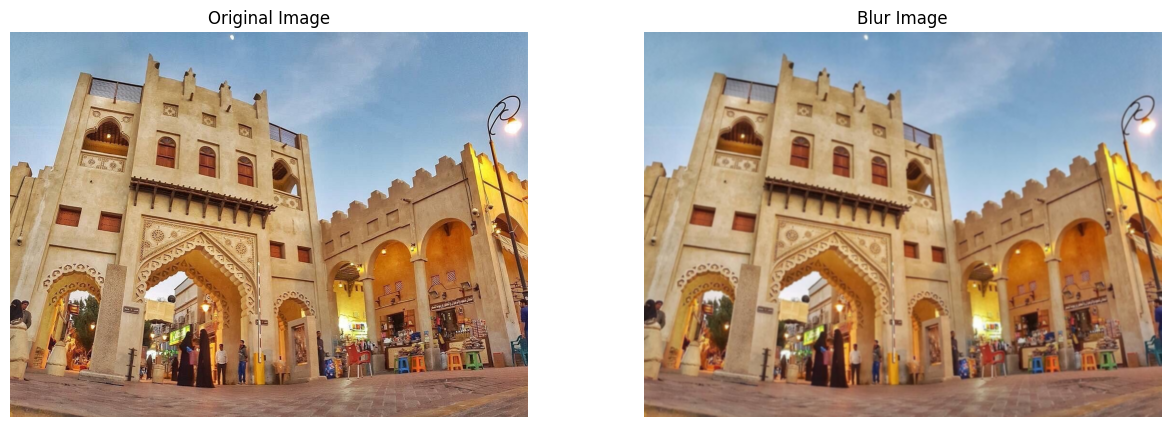

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("img/task_1.jpeg")

blurred_img = cv2.GaussianBlur(img, (7, 7), 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis("off")
ax2.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
ax2.set_title("Blur Image")
ax2.axis("off")
plt.show()

## Task 02
In the lab you were given 2 examples of the smoothing filters. 
* Write the code for another filtering technique (not avergaing or gaussian) 
* Show its result on image. 
* Explain how the kernel is generated

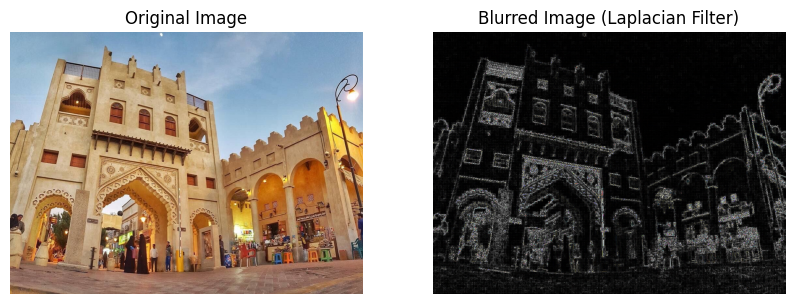

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input image
img = cv2.imread('img/task_1.jpeg')

# Apply Laplacian filter
blurred_img = cv2.Laplacian(img, cv2.CV_64F)

# Scale the output to the range [0, 255]
blurred_img = np.uint8(np.absolute(blurred_img))

# Display original and blurred image side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Blurred Image (Laplacian Filter)')
ax2.axis('off')
plt.show()

The kernel for the Laplacian filter is generated by taking the second derivative of the
image intensity values with respect to both the x and y directions.
This can be expressed using a 3x3 kernel as follows:
  0  1  0
  1 -4  1
  0  1  0
After applying the filter, we scale the output values to the range [0, 255] using the np.uint8() and np.absolute()
functions, so that the resulting blurred image can be displayed as an RGB image using matplotlib.pyplot.